STUDENT PERFORMANCE PREDICTION SYSTEM
-------------------Exploratory Data Analysis Module-----------------


Mean Squared Error 1.98
Root Mean Squared Error 1.41
R2 score 0.85
Accuracy of Random Forest Regressor before gridserachcv 85.2 %
Difference between predicted and expected value


,expected value,predicted value
0,14,12.965
1,10,9.910
2,13,14.370
3,12,12.435
4,12,12.830


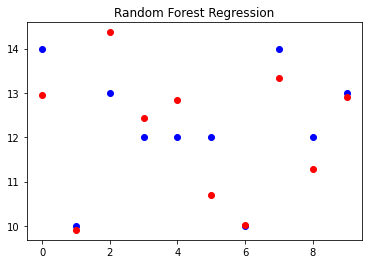

           featureimportance
G2                  0.555557
G1                  0.218278
absences            0.048727
failures            0.029311
Subject             0.013705
age                 0.010663
studytime           0.008795
famrel              0.008137
Walc                0.007578
goout               0.007279


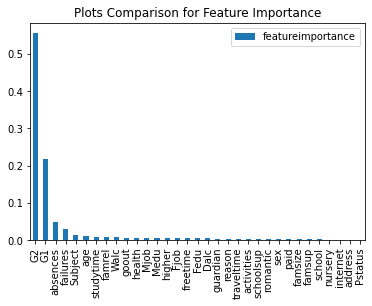

The Best Parameters are {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}



Mean square error 1.99
root mean square error 1.41
R2 score 0.85
Accuracy of Random Forest Regressor after gridserachcv 85.41 %



In [2]:
import Regression
import EDA
import Classification
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


#Color Palette
bold='\033[1m'
close='\033[00m'
red='\033[91m'
green='\033[92m'

          
def main():                           
        #Creating 3 objects for each classes
        e=EDA.EDAClass()
        reg=Regression.RegressionClass()
        cls=Classification.Classify()        
        print(bold+green+"STUDENT PERFORMANCE PREDICTION SYSTEM"+close)        
        #Calling EDA
        
        stud=e.EDA()
        
        #Encoding the data
        trans_data=reg.transform(stud)         
        #Calling Regression Function
        #Back up the data to avoid overwrite
        df_new=trans_data.copy()         
        #Transform target variable
#         le = LabelEncoder()
#         df_new['G3']=le.fit_transform(df_new['G3'])         
        #Assigning X and y 
        X= df_new.drop('G3',axis=1)
        y = df_new['G3']
        #Spliting training and test data in 80 : 20 proportion
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)       
        scaler = StandardScaler()        
        X_train = scaler.fit_transform(X_train)        
        X_test = scaler.fit_transform(X_test)          
        model=reg.RandomForestRegressor(X_train, X_test, y_train, y_test) 
        reg.scatterplot(X_test,y_test,model)
        reg.feature_imp(X,model)
        reg.GridSearchCV(X_train, X_test, y_train, y_test)
        
        #Calling Classifiers   
        #Categorise data into three classes
        cat = (-1, 10.0, 15.0,20.0)
        cat_name = ['poor','average','excellent']
        df_new['G3']= pd.cut(df_new['G3'], bins= cat, labels= cat_name)       
    
        X= df_new.drop('G3',axis=1)
        y = df_new['G3']
        #Spliting training and test data in 80 : 20 proportion
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)       
        scaler = StandardScaler()        
        X_train = scaler.fit_transform(X_train)        
        X_test = scaler.fit_transform(X_test) 
        
        
        
        #acc1=cls.RandomForstClassifier(X_train, X_test, y_train, y_test) 
        
        #acc2=cls.SVM(X_train, X_test, y_train, y_test)    
        
        #acc3=cls.MLP(X_train, X_test, y_train, y_test)
        
        #print(bold+green+"Accuracy of three model in Random Under Sampling RFC,SVM,MLP",acc1,acc2,acc3,"%"+close)

main()